# 📊 End-to-End Sales Forecasting & Business Intelligence Dashboard

## 🚀 Project Summary

This project demonstrates how Machine Learning & Business Intelligence can be combined to build an executive sales forecasting dashboard.

The solution simulates a real-world analytics workflow:

**Raw Data → ETL → Forecast Model → Data Warehouse → Power BI Dashboard**

### 🎯 Objectives

* Transform raw retail sales data into analytics-ready datasets
* Build a time-series forecasting model
* Evaluate model performance using ML metrics
* Integrate predictions into a BI dashboard
* Create executive-level KPIs & interactive analytics

### 🏗️ Architecture Overview:

Raw Sales Data->
Python ETL Pipeline->
Time-Series Forecast Model->
Prediction Export (CSV)->
Power BI Star Schema->
Executive Dashboard

### 🤖 Machine Learning & Forecasting

Sales forecasting was performed using Facebook Prophet.

**-📏 Model Evaluation**

- MAE: 14,501

- RMSE: 19,156

- MAPE: 17.8%

The model captures trend & seasonality, making it suitable for business planning.

### ⚙️ Data Engineering & ETL

Python pipeline performs:

- Date parsing & feature engineering

- Monthly aggregation of sales

- Category-level forecasting

- Export of BI-ready datasets

 Libraries Used :

- Pandas

- NumPy

- Prophet

### 🧩 Data Modeling & Star Schema

A star schema was designed in Power BI.

**⭐ Fact Table**

fact_sales → historical transactions

**📅 Dimension Table**

calendar → continuous date table

**🔮 Prediction Table**

category_forecasts → ML predictions

This enables scalable & performant analytics.

### 📈 Business KPIs (DAX)

Executive metrics created in Power BI:

- Total Revenue

- Forecast Revenue

- Forecast Gap

- Month-over-Month Growth

- Year-over-Year Growth

These KPIs support strategic planning & performance monitoring.

### 📊 Dashboard Highlights
- Executive Overview
- Revenue KPI cards
- Forecast vs Actual trend
- Growth indicators
- Performance Insights
- Revenue by Region
- Revenue by Product Category
- Interactive Date Filtering

### 🛠️ Tech Stack
- Area	Tools
- Data Processing	Python & Pandas
- Machine Learning	Prophet
- BI & Visualization	Power BI
- Analytics	DAX

### 💼 Business Value

This solution demonstrates how predictive analytics can enable:

- Revenue planning & budgeting

- Demand forecasting

- Performance monitoring

- Data-driven decision making

### 📌 Conclusion

This project showcases an end-to-end analytics pipeline combining:

* Data Engineering + Machine Learning + Business Intelligence to deliver actionable insights for business users.

In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/datasets/rohitsahoo/sales-forecasting/train.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month



In [6]:
df[['Order Date','year','month']].head()


,Order Date,year,month
0,2017-11-08,2017,11
1,2017-11-08,2017,11
2,2017-06-12,2017,6
3,2016-10-11,2016,10
4,2016-10-11,2016,10


In [10]:
# BI dataset (for Power BI visuals)
bi_sales = (
    df.groupby(['year','month','Region','Category'])['Sales']
    .sum()
    .reset_index()
)

bi_sales.head()


,year,month,Region,Category,Sales
0,2015,1,Central,Furniture,506.358
1,2015,1,Central,Office Supplies,996.408
2,2015,1,Central,Technology,31.200
3,2015,1,East,Furniture,199.004
4,2015,1,East,Office Supplies,112.970


In [9]:
#time-series dataset (for ML)
ts = (
    df.groupby('Order Date')['Sales']
    .sum()
    .reset_index()
)

ts = ts.resample('MS', on='Order Date').sum().reset_index()
ts.rename(columns={'Order Date':'ds','Sales':'y'}, inplace=True)

ts.head()


,ds,y
0,2015-01-01,14205.707
1,2015-02-01,4519.892
2,2015-03-01,55205.797
3,2015-04-01,27906.855
4,2015-05-01,23644.303


In [11]:
!pip install prophet


In [ ]:

# Training of the data 
from prophet import Prophet

model = Prophet()
model.fit(ts)

future = model.make_future_dataframe(periods=3, freq='MS')
forecast = model.predict(future)

forecast[['ds','yhat']].tail()


In [13]:
# Exporting the data into csv format
bi_sales.to_csv("/kaggle/working/bi_sales_table.csv", index=False)
forecast[['ds','yhat']].to_csv("/kaggle/working/sales_forecast.csv", index=False)


## Model Evaluation

This section has been carefully crafted to facilitate deeper analysis, allowing us to uncover valuable insights from the data. It is completed to provide further analysis and gain more insights into aspects such as category-wise breakdown, revenue, and order data.

In [14]:
# last 6 months = test
train = ts[:-6]
test = ts[-6:]

train.shape, test.shape


((42, 2), (6, 2))

In [15]:
from prophet import Prophet

model = Prophet()
model.fit(train)


14:31:36 - cmdstanpy - INFO - Chain [1] start processing
14:31:36 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = model.make_future_dataframe(periods=6, freq='MS')
forecast = model.predict(future)

pred_test = forecast.tail(6)[['ds','yhat']]
pred_test


,ds,yhat
42,2018-07-01,44107.489652
43,2018-08-01,39286.263089
44,2018-09-01,85450.341614
45,2018-10-01,49818.276102
46,2018-11-01,88676.013199
47,2018-12-01,88174.037115


In [17]:
eval_df = test.merge(pred_test, on='ds')
eval_df


,ds,y,yhat
0,2018-07-01,44825.1040,44107.489652
1,2018-08-01,62837.8480,39286.263089
2,2018-09-01,86152.8880,85450.341614
3,2018-10-01,77448.1312,49818.276102
4,2018-11-01,117938.1550,88676.013199
5,2018-12-01,83030.3888,88174.037115


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])
rmse = np.sqrt(mean_squared_error(eval_df['y'], eval_df['yhat']))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 14501.231809777952
RMSE: 19156.48126652758


In [19]:
mape = np.mean(np.abs((eval_df['y'] - eval_df['yhat']) / eval_df['y'])) * 100
print("MAPE:", mape, "%")


MAPE: 17.762991844220846 %


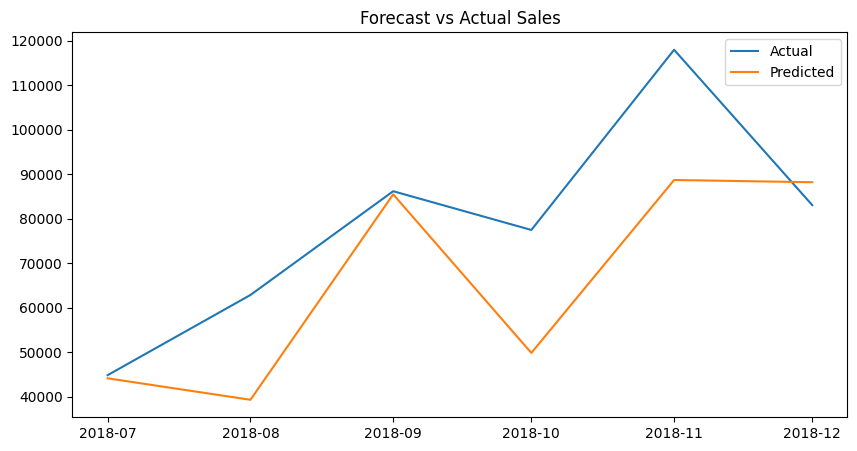

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(eval_df['ds'], eval_df['y'], label='Actual')
plt.plot(eval_df['ds'], eval_df['yhat'], label='Predicted')
plt.legend()
plt.title("Forecast vs Actual Sales")
plt.show()


# Forecast per Category (Business-realistic modeling)

In [21]:
categories = df['Category'].unique()
category_forecasts = []

from prophet import Prophet

for cat in categories:
    cat_df = df[df['Category'] == cat]
    
    ts_cat = (
        cat_df.groupby('Order Date')['Sales']
        .sum()
        .resample('MS')
        .sum()
        .reset_index()
    )
    
    ts_cat.rename(columns={'Order Date':'ds','Sales':'y'}, inplace=True)
    
    model = Prophet(yearly_seasonality=True)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(ts_cat)
    
    future = model.make_future_dataframe(periods=3, freq='MS')
    forecast_cat = model.predict(future)[['ds','yhat']]
    forecast_cat['Category'] = cat
    
    category_forecasts.append(forecast_cat)

category_forecasts = pd.concat(category_forecasts)
category_forecasts.head()


14:37:26 - cmdstanpy - INFO - Chain [1] start processing
14:37:26 - cmdstanpy - INFO - Chain [1] done processing
14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing
14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,Category
0,2015-01-01,6659.439071,Furniture
1,2015-02-01,1634.964531,Furniture
2,2015-03-01,11840.698351,Furniture
3,2015-04-01,5571.198110,Furniture
4,2015-05-01,10018.625519,Furniture


In [22]:
# fact + dimension tables like a real BI system
# Dimensions table
dim_date = df[['Order Date']].drop_duplicates()
dim_date['Year'] = dim_date['Order Date'].dt.year
dim_date['Month'] = dim_date['Order Date'].dt.month
dim_date['MonthName'] = dim_date['Order Date'].dt.month_name()

dim_region = df[['Region']].drop_duplicates()
dim_category = df[['Category','Sub-Category']].drop_duplicates()

# Fact table
fact_sales = df[['Order Date','Region','Category','Sales']]


In [23]:
# Exporting the files into CSV for power BI
dim_date.to_csv("/kaggle/working/dim_date.csv", index=False)
dim_region.to_csv("/kaggle/working/dim_region.csv", index=False)
dim_category.to_csv("/kaggle/working/dim_category.csv", index=False)
fact_sales.to_csv("/kaggle/working/fact_sales.csv", index=False)
category_forecasts.to_csv("/kaggle/working/category_forecasts.csv", index=False)
